In [1]:
from functools import reduce
import operator

import numpy as np

from cospar import reader, F
from everest.window import Canvas, DataChannel
%matplotlib inline

In [2]:
conds = (
    F('aspect') == 1,
    F('f') == 1,
    F('tauRef') <= 1e6,
    F('tauRef') >= 1e5,
    F('temperatureField') == '_built_oiskeaosle-woatihoo',
    )
cut = reader[reduce(operator.__and__, conds)]
datas = reader[cut : ('tauRef', 't', 'Nu')]

In [3]:
alltau, allt, allNu = [], [], []
alls = []
tauVals = np.log10(np.array(sorted(set(tau for tau, *_ in datas.values()))))
tauDiff = np.diff(tauVals)
sDict = dict(zip(tauVals, tauDiff))
sDict[tauVals[-1]] = tauDiff[-1]
ssum = sum(sDict.values())
for tauRef, t, Nu in datas.values():
    tauRef = np.log10(tauRef)
    alltau.extend(np.full(t.shape, tauRef))
    allt.extend(t)
    allNu.extend(Nu)
    alls.extend(np.full(t.shape, sDict[tauRef] / ssum))
alltau, allt, allNu = np.array(alltau), np.array(allt), np.array(allNu)
alls = np.array(alls)

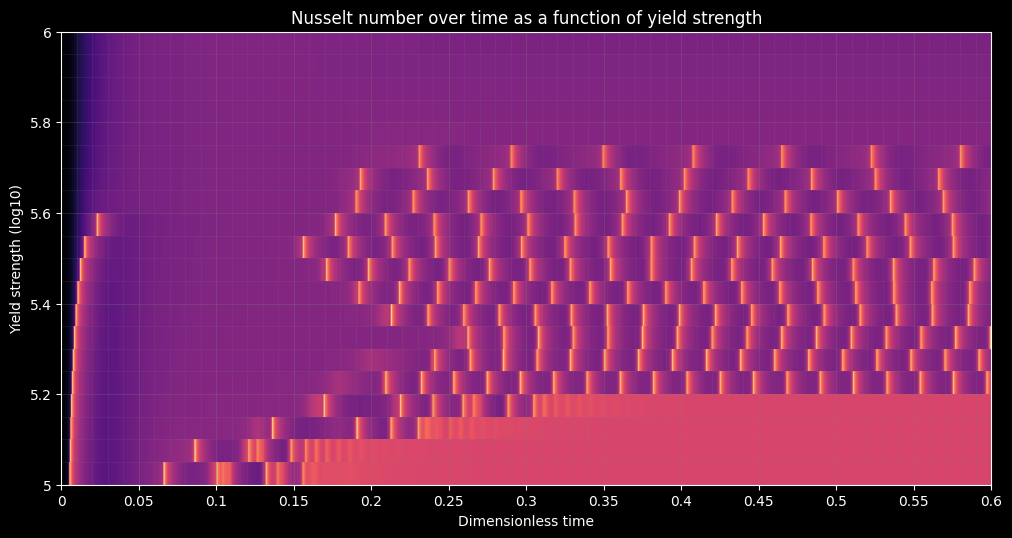

In [6]:
canvas = Canvas(size = (12, 6), colour = 'white', fill = 'black')
ax = canvas.make_ax(title = 'Nusselt number over time as a function of yield strength')

ax.scatter(
    DataChannel(allt, lims = (0, 0.6), label = 'Dimensionless time'),
    DataChannel(alltau, lims = (5, 6), label = 'Yield strength (log10)'),
    c = np.log10(allNu),
    cmap = 'magma',
    s = 1.1 * (alls * ax.inches[1] * 72) ** 2,
    alpha = 1.,
    marker = 2,
    )

canvas.show()

In [5]:
# conds = (
#     F('aspect') == 1,
#     F('f') == 1,
#     F('temperatureField') == '_built_oiskeaosle-woatihoo',
#     )
# cut = reader[reduce(operator.__and__, conds)]
# datas = reader[cut : ('tauRef', 't', 'Nu')]